# <font color='#31394d'>k-Means Clustering Practice Exercise</font>

In this notebook, we are going to apply clustering algorithm to identify homogenous groups of customers from the `mall_customer.csv` dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### <font color='#31394d'>Import and Explore the Data</font>

In [2]:
df = pd.read_csv("data/mall_customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


🚀 <font color='#D9C4B1'>Exercise: </font> Explore your data. How large is it? Are there any missing values? What are the data types?

In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### Observations
- The dataset has 5 columns with 4 numeric and 1 categorical variable.
- There are no null values.
- Customers happen to have a mean age of __38 yrs__ with an average annual income of __$60.56k__ and an average spending score of __50__.

🚀 <font color='#D9C4B1'>Exercise: </font> The income and spending score columns have pretty awkward names. Rename them as "AnnualIncome" and "SpendingScore", respectively.

In [6]:
df=df.rename(columns={'Annual Income (k$)':'AnnualIncome','Spending Score (1-100)':'SpendingScore'})
df.columns

Index(['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='object')

🚀 <font color='#D9C4B1'>Exercise: </font> Visualize the `Age` and `SpendingScore` distinguished by `Gender`.

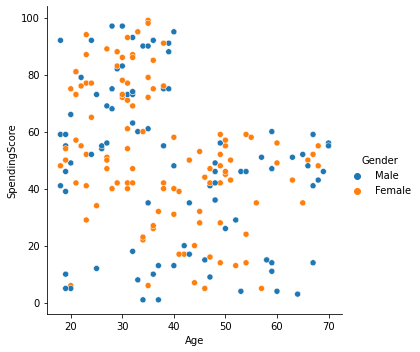

In [7]:
sns.relplot(x='Age',y='SpendingScore',data=df,hue='Gender');

### <font color='#31394d'> Apply k-Means Clustering </font>

Let's attempt to identify clusters based on Age and SpendingScore. Using two variables will allow us to visualize the results, but feel free to re-run this with all the continuous variables. K-means clustering is not suitable for categorical variables.

In [8]:
from sklearn.cluster import KMeans

🚀 <font color='#D9C4B1'>Exercise: </font> Have a look at the help for `KMeans`. What do the "init" and "n_init" arguments do?

In [9]:
?KMeans

Let's perform k-Means clustering with k=4 (no particular reason, just as an example!)...

In [10]:
km = KMeans(n_clusters=4) # K = 4 
km.fit(df[['Age','SpendingScore']])

KMeans(n_clusters=4)

🚀 <font color='#D9C4B1'>Exercise: </font> What attributes does the `km` object have?

In [11]:
?km

Attributes in `km` object include:
- cluster-centers_ - coordinates of cluster centers.
- labels_ - labels of each point
- inertia - sum of squared distances of samples to their closest cluster.
- n_iter - number of iterations run.
- n_features_in_ - number of features seen during fitting.
- features_names_in - names of features seen during fitting.

Let's have a look at cluster centroids:

In [12]:
pd.DataFrame(km.cluster_centers_, columns=['Age','SpendingScore'], index=['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4'])

,Age,SpendingScore
Cluster1,55.708333,48.229167
Cluster2,30.175439,82.350877
Cluster3,43.291667,15.020833
Cluster4,27.617021,49.148936


Let's add a column with the predicted cluster label:

In [13]:
df['Cluster'] = km.labels_ + 1
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


Let's visualize our clusters. Note that we can only do this because this is a toy example with two features (so we can plot them in a 2D space). If we had more than three features, we would not be able to visualize the clusters, but we could still examine the cluster centroids to determine what the clusters represent.

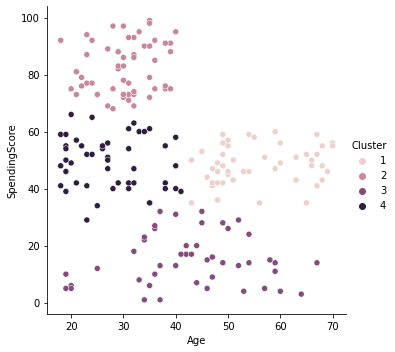

In [14]:
sns.relplot(x="Age", y="SpendingScore", data=df, hue="Cluster");

### <font color='#31394d'> Finding the Best k</font>

The `sklearn` `KMeans` method calls the total within-cluster variation "inertia". This is stored as the `inertia_` attribute of the fitted object. Next, we will loop over different values of k, store the inertia and choose the best value of k using the "elbow" method. 

In [15]:
inertia = []
for k in range(1 , 21):
    estimator = KMeans(n_clusters=k)
    estimator.fit(df[['Age','SpendingScore']])
    inertia.append(estimator.inertia_)

In [16]:
inertia

[171535.5,
 75949.15601023019,
 45840.67661610867,
 28165.58356662934,
 23811.52352472089,
 19576.01322135533,
 15523.684014328755,
 13006.48362885102,
 11486.099698418053,
 10549.137513747759,
 9383.927336872064,
 8834.400551994302,
 7951.298034233456,
 7255.095466233115,
 6600.19244236156,
 5993.710202705792,
 5693.8264693339,
 5388.936299974535,
 5042.444480519482,
 4754.2423881673885]

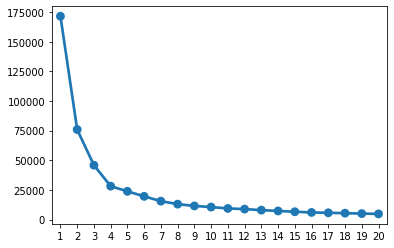

In [17]:
sns.pointplot(x=np.arange(1,21), y=inertia);

🚀 <font color='#D9C4B1'>Exercise: </font> How many clusters would you select? (There is no single "right" answer.)

I will select __7 clusters i.e. (k=7)__.